<a href="https://colab.research.google.com/github/Khaled2086/ML-Projects/blob/main/loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to dataframe
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan status prediction/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# finding null data
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# drop the missing values as we have non numeric data
df=df.dropna()
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
#labbel encoding
df.replace({'Loan_Status':{'N': 0, 'Y':1}},inplace=True)
df.head()

<ipython-input-35-b55ffa43d734>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Loan_Status':{'N': 0, 'Y':1}},inplace=True)
<ipython-input-35-b55ffa43d734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Loan_Status':{'N': 0, 'Y':1}},inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#dependent column values
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
# replace the value of 3+ to 4
df=df.replace(to_replace='3+', value=4)
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

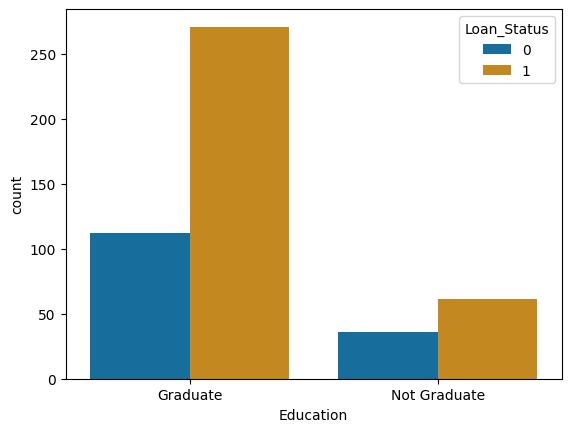

In [ ]:
#data visualization
sns.countplot(x='Education', hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

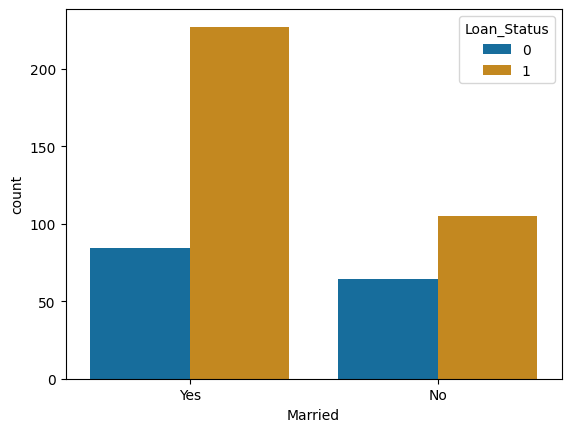

In [ ]:
sns.countplot(x='Married', hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

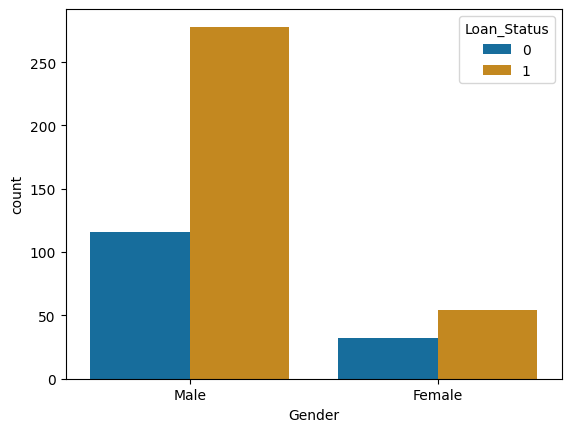

In [ ]:
sns.countplot(x='Gender', hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

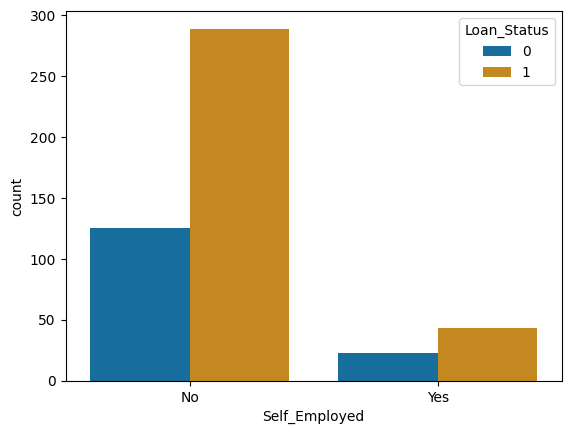

In [ ]:
sns.countplot(x='Self_Employed', hue='Loan_Status',data=df)

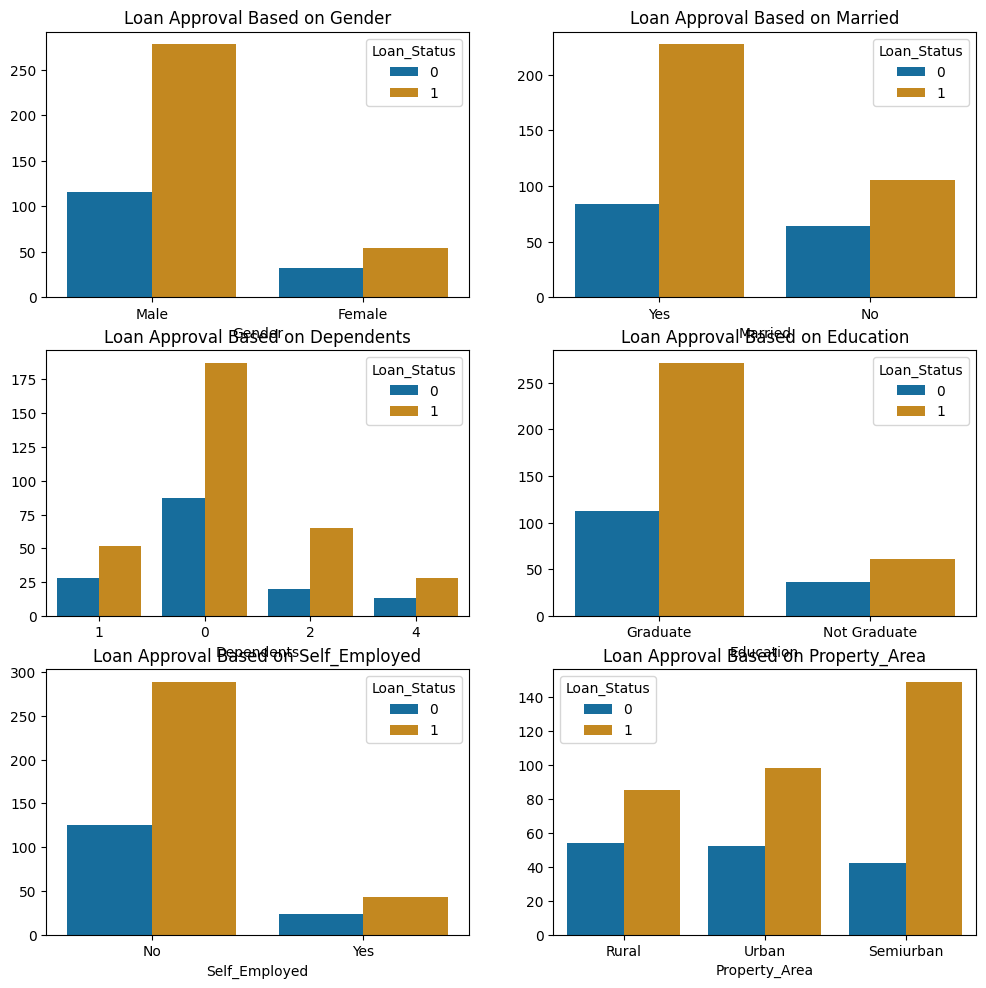

In [ ]:
def plot_scatter(x_,fig):
    plt.subplot(5,2,fig)
    sns.set_palette("colorblind")
    sns.countplot(x=df[x_],hue =df['Loan_Status'])
    plt.title("Loan Approval Based on " + x_)
    plt.xlabel(x_)
    plt.ylabel("")



plt.figure(figsize=(12,20))
plot_scatter('Gender',1)
plot_scatter('Married',2)
plot_scatter('Dependents',3)
plot_scatter('Education',4)
plot_scatter('Self_Employed',5)
plot_scatter('Property_Area',6)






In [ ]:
#convert catergorical columns to numerical values
# Remove inplace=True and reassign the result back to df
df = df.replace(
    {'Married': {'No':0, 'Yes':1},
    'Gender':{'Male':1,'Female':0},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}
    )

<ipython-input-43-ebf3837d2d4f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=df['Education']
label= LabelEncoder()
enc = label.fit_transform(enc)
df['Education']=enc

Education

0--> Graduated

1--> Not Graduated

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
x=df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
y=df['Loan_Status']
print(x.shape, y.shape)

(480, 11) (480,)


In [ ]:
# spliting the data
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)
print(x_train.shape,x_test.shape)

(432, 11) (48, 11)


In [ ]:
# training SVM model
classifier=svm.SVC(kernel='linear')
predict_train= classifier.fit(x_train,y_train)

In [ ]:
#accuracy score
predict_train=classifier.predict(x_train)
accuracy_train=accuracy_score(predict_train,y_train)
print(accuracy_train)

0.7916666666666666


In [ ]:
predict_test=classifier.predict(x_test)
accuracy_test=accuracy_score(predict_test,y_test)
print(accuracy_test)

0.8541666666666666


In [58]:
# making predictions
#inputs=(1	,1,	1,	0,	0,	4583,	1508.0,	128.0,	360.0,	1.0,	0	)
#inputs=(1,	0,	0,	0,	0,	6000,	0.0,	141.0,	360.0,	1.0,	2	)
inputs=(1,	1,	0,	0,	1,	3000,	0.0,	66.0,	360.0,	1.0,	2)

inputs=np.asarray(inputs)
inputs_reshape=inputs.reshape(1,-1)
prediction=classifier.predict(inputs_reshape)
print(prediction)
if (prediction[0]==0):
  print('Loan will not be approved')
else:
  print('loan will be approved')


[1]
loan will be approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
